# Model for porteføljevalg 
Vi starter med en enkel model for udviklingen af værdien af en aktie portfølje. Fremstillingen nededfor tager udgangspunkt i Carta og Conversano (2020), som opskriver en modelramme for at anvende Kelly-kriteriet på aktiemarkedsdata og dermed til porteføljeoptimering. Carta og Conversano (2020) tager udgangspunkt i et risikofrit aktiv altid bevare sin værdi, og et risikofyldt aktiv's værdi, som i hver periode enten fordobles eller mistes. Vi genreliserer denne fremstilling mhp. på at kunne analysere skattesystemets effekt på den optimale portefølje. 

## Værdient af en portefølje med diskret fordeling af afkast.  
Vi betragter først et marked med et sikkert aktiv med et risikofrit afkast, $R=1+r$ og et risikofyldt aktiv, som med sandsynlighed $p$ har et højt afkastet $R_h=(1+r_h)>R$ og med sandsynlighed $1-p$ har et lavt afkast $R_l=(1+r_l)$, hvor $R_h>R>R_l$. I Carta og Conversano (2020) er $R=1$, $R_l=0$, og $R_l=2$, således at det risikofrie aktiv altid bevare sin værdi, mens det risikofyldte aktiv's værdi i hver periode enten fordobles eller mistes. 

Antag nu, at en investor allokerer en fast andel, $\alpha$, af sin initiale formue, $W_0$ i det risikofyldte aktiv, og den resterende andel, $1-\alpha$ i det sikre aktiv. Porteføljens værdi efter $n$ perioder er da

$$
W_n=W_0[(1-\alpha)R+\alpha R_h]^m [(1-\alpha)R+\alpha R_l]^{n−m}= W_0[R +\alpha (R_h-R)]^m [R +\alpha (R_l-R)]^{n−m}
$$

hvor $m$ er antallet af gange, hvor aktivet giver et højt afkast. 

I eksemplet med $R=1$, $R_l=0$ og $R_h=2$ har vi f.eks.

$$
W_n=W_0(1+\alpha)^m(1-\alpha)^{n−m}
$$

### Kelly Kriteriet
Kelly (1956) forslog, at den optimale portefølje skulle findes ved at maksimere den forventede værdi af vækstraten. 

Lad $G_n$ være den gennemsnitlige vækstrate efter $n$ perioder, således at den samlede vækst $W_n/W_0$ efter $n$ perioder kan skrives som

$$(1+G_n)^n=W_n/W_0=(R +\alpha (R_h-R))^m(R +\alpha (R_l-R))^{n−m}$$

Vi har da $(1+G_n)=(W_n/W_0)^{1/n}$. Da $\ln(1+G_n) \approx G_n$ for små værdier af $G_n$, kan vi udtrykke den gennemsnitlige vækstrate som 

$$G_n(\alpha)=\ln[(W_n/W_0)^{1/n}]=\frac{m}{n} \ln [R +\alpha (R_h-R)]+ \frac{n-m}{n}  \ln [R +\alpha (R_l-R))]$$

Den forventede værdi af vækstraten bliver da 
$$g_n(\alpha)=\mathbb{E}[G_n(\alpha)]=p \ln [R +\alpha (R_h-R)]+ (1-p) \ln [R+\alpha (R_l-R)]$$

hvor det sidste lighedstegn følger af at den forventede værdi af andelen af perioder med højt afkast er lig sandsynligheden for højt afkast $\mathbb{E}(\frac{m}{n})=p$. Tilsvarende har vi $\mathbb{E}(\frac{n-m}{n})=1-p$

Den optimale portefølje findes med at maksimere det forventede værdi af vækstraten 
$$\alpha^*=\arg \max_{\alpha} g_n(\alpha)=\arg \max_{\alpha} p \ln [R +\alpha (R_h-R)]+ (1-p) \ln [R+\alpha (R_l-R)]$$

Da logaritme funktionen er strengt konkav er $g(\alpha)$ også stregt konkav. Dermed er førsteordens betingelserne, $g_n'(\alpha^*)=0$, nødvendige og tilstrækkelige for en indre løsning.
$$g_n'(\alpha^*)= \frac{p(R_h-R)}{R +\alpha (R_h-R)}+ \frac{(1-p)(R_l-R)}{R+\alpha (R_l-R)}=0$$
Vi løser $g_n'(\alpha^*)=0$ for den optimal portføljeandel, $\alpha^*$
$$\alpha^*=(1-p)\frac{R}{(R-R_h)} + p\frac{R}{(R-R_l)}
=\frac{(1-p)}{(1-R_h/R)} + \frac{p}{(1-R_l/R)}$$
Vi ser at den optimale andel i det risikofyldte aktiv i følge Kelly kriteriet er en vægtet sum af forholdet mellem afkastet på det rissikofrie aktiv og henholdsvis merafkastet $(R_h-R)>0$ eller tabet $(R_l-R)<0$. Vi ser let at portefølje andelen i det riskofyldte aktiv, $\alpha^*$ er voksendede i merafkastet $(R_h-R)>0$ og sandsynligheden for et højt afkast, $p$, mens det aftager i størrelsen af tabet $(R_l-R)>0$

### Python implementering af optimal portefølje ifølge Kelly kriteriet
Definer først funktioner som beregner den forventede vækst og den optimale portefølje andel. 

In [1]:
%clear # rens hukommelsen
import numpy as np              # Indlæs library med matematik og arrays
import matplotlib.pyplot as plt # Indlæs library til at lave plots/grafer

def g(α=0.5, p=0.7, Rl=0, Rh=2, R=1): # forventet vækstrate, g - def=at definere en funktion
    g=p * np.log(R+α*(Rh-R))+ (1-p) *np.log(R+α*(Rl-R)) #g: navnet på funktionen
    return g 

def kelly(p=0.7, Rl=0, Rh=2, R=1):
    α_opt=(1-p)/(1-Rh/R) + p/(1-Rl/R)
    g_opt=g(α_opt, p, Rl, Rh, R)
    return α_opt, g_opt

### Plot den forventede vækst og find den optimale portefølje

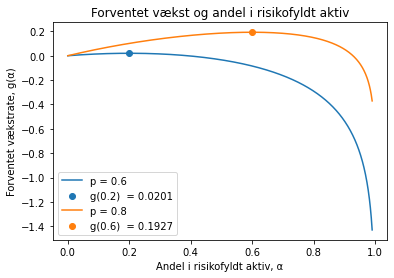

In [2]:
### Python implementering af optimal portefølje ifølge Kelly kriteriet
for p in [0.6, 0.8]: 
    Rl=0; Rh=2; R=1;                  # sæt parametre 
    α_kelly, g_kelly=kelly(p, Rl, Rh, R)    # bestem optimal portefølje iht Kelly

    # plot forventet vækstrate for forskellige værdier af α
    a=np.linspace(0.0,0.99,1000)            # grid med 1000 værdier af α mellem 0.01 og 0.99
    plt.plot(a,g(a,p, Rl, Rh, R), label = 'p = ' + str(p) )            # plot g(α) mod α
    plt.scatter(α_kelly, g_kelly, label='g(' + str(round(α_kelly,4)) +  ')  = ' + str(round(g_kelly,4)) )  # indsæt α_opt i graf        
    plt.ylabel('Forventet vækstrate, g(α)')
    plt.xlabel('Andel i risikofyldt aktiv, α')
    plt.title('Forventet vækst og andel i risikofyldt aktiv')
plt.legend()
plt.show()

Vi betrtagter nu en fordeling af de usikre afkast med $R_h=R+\sigma$ og $R_l=R-\sigma$, hvor $\sigma$ er spredningen. Vi beregner herefter den optimale andel i det usikre aktiv som funktion af $\sigma$ og $p$, 

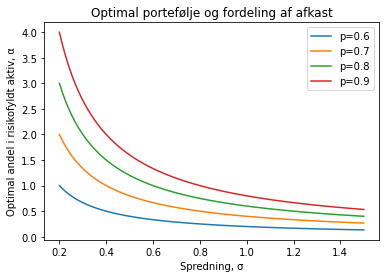

In [3]:
# optimal portefølje iht Kelly forskellige værdier af p, Rl, og Rh
for pk in [0.6, 0.7, 0.8, 0.9]:
    σ=np.linspace(0.2,1.5,100)            # grid med 1000 værdier af α mellem 0.01 og 0.99
    α_σ, g_σ=kelly(p=pk, Rl=R-σ, Rh=R+σ, R=R)    # bestem optimal portefølje iht Kell
    plt.plot(σ,α_σ, label='p='+str(pk))            # plot g(a) mod α
    plt.title('Optimal portefølje og fordeling af afkast')
    plt.ylabel('Optimal andel i risikofyldt aktiv, α')
    plt.xlabel('Spredning, σ')
plt.legend()
plt.show()

Som forventet er andelen som investeres i det risikofyldte aktiv aftagende i speredningen (risiko) og voksende i sandsynligheden for success. 

## Værdien af en portefølje med kontinuert fordeling af afkast
Vi betragter nu en investor, som skal fordele sin initiale formue $W_0$ mellem $k+1$ forkellige aktiver. Det første aktiv, $i=0$, har et riskikofrik afkast, $R_0$, mens afkastet $R_i$ for aktiv $i=1, \dots, k$ er stokastisk. Lad $\alpha_i$ angive den andelen som investeres i aktiv $i$, hvor $\alpha_0=1-\sum_{i=1}^k \alpha_i$ da andelene summer til $1$. Når aktivernes afkast er realiseret i slutningen af en period er porteføljens værdi

$$
W_1(\alpha)=W_0\sum_{i=0}^k\alpha_i R_i = W_0\sum_{i=1}^k(R_0+\alpha_i (R_i-R_0))
$$

hvor $\alpha=(\alpha_1, \dots, \alpha_k)$

For at finde den optimale portefølje, $\alpha$, antages det at investoren at maksimerer den forventede nytte $\mathbb{E}[u(W_m)]$ af porteføljens værdi $W_n$ efter $n$ tidsperioder, hvor 

$$W_n(\alpha)= W_0\prod_{t=1}^n \sum_{i=1}^k(R_0+\alpha_i (R_{i,t}-R_0))$$

Nyttefunktionen, $u$, har betydning for investorens afvejning er mellem forventet afkast $\mathbb{E}[W_m]$ og risiko, som måles ved variansen af porteføljens værdi $W_n$, $\text{Var}[W_m]$. Vælges nyttefunktionen $u(W_m)=\ln(W_m)$, svarer dette til Kelly kriteriet, hvor investoren ønsker at maksimere den forventede vækst i porteføljen. 

Carta og Conversano (2020) viser at når $n \rightarrow \infty$, og fordelingen af afkast er symetrisk omkring middelværdien $\mu = (\mu_1, \dots, \mu_k)$ og har varians-kovarians matrix $\Omega$, kan den optimale portefølje for en agent med uendelig tidshorisont findes som løsning til maksimerings problemet
$$\max_{\alpha} g'_{\infty}(\alpha)= \max_{\alpha} R_0  +  \alpha' (\mu-R_0) - 1/2 \alpha' \Omega \alpha
$$
med løsning
$$
\alpha =\Omega^{-1}(\mu-R_0)
$$

Bemærk at $E(\alpha'R) = R_0  +  \alpha' (\mu-R_0)$ netop er det forventede afkast af porteføljen, og $Var(\alpha'R)=\alpha' \Omega \alpha$ netop er variansen på porteføljens afkast. 
Kelly kriteriet resulterer i en fast afvejling mellem forventet afkast og porteføljens risiko målt ved variansen. 

## Python implementering af optimal portefølje ifølge Kelly kriteriet
Definer først funktioner som beregner den forventede vækst og den optimale portefølje andel for aktiver med kontinuert fordelt afkast.

### installer pandas, pandas_datareader, numpy hvis ikke installeret
Fjern # i koden nedenfor

In [4]:
# !pip install pandas             
# !pip install pandas_datareader 
# !pip install numpy             

### Indlæs python bibliotekter

In [5]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Beregn Kelly k asset portfolio 
%clear # rens hukommelsen
from numpy.linalg import inv         # Indlæs library med til at beregne invers af matrix
import numpy as np              # Indlæs library med matematik og arrays
import matplotlib.pyplot as plt # Indlæs library til at lave plots/grafer
from scipy.optimize import minimize, Bounds, LinearConstraint

def g_cont(α, μ, Ω, R_0): 
    '''Expected growth rate'''
    α=α.reshape(-1,1)
    μ=μ.reshape(-1,1)
    g=R_0  + α.T @ (μ-R_0)  - 1/2 * α.T @ Ω @ α
    return  g.flatten()

def kelly_cont(μ,Ω, R_0, shorting=1): 
    '''Optimal portfolio according to Kelly criterion'''
    if shorting==1: 
        return  inv(Ω)@(μ-R_0) 
    if shorting==0: 
        n=μ.size # number of assets
        fun = lambda α: -g_cont(α, μ, Ω, R_0)
        cons = ({'type': 'ineq', 'fun': lambda x:  1-np.sum(x)})
        bnds=Bounds(np.zeros(n),np.ones(n))
        res = minimize(fun, x0=np.ones(n)/(n+1), bounds=bnds, constraints=cons, options={'ftol': 1e-14})
        return res.x  

Definer herefter funktio som beregner den middelværdi, variansaf portefølje


In [7]:
def E_stdafv_pf(α, μ, Ω, R_0): 
    '''Expected growth rate'''
    α=α.reshape(-1,1)
    μ=μ.reshape(-1,1)
    e_pf = R_0  + α.T @ (μ-R_0) # middeværdi af portefølje sum_i, μ[i]*α[i]
    var_pf= α.T @ Ω @ α  # varians af portefølje sum_i, sum_j Ω[i,j]*α[i]*α[j]
    std_afv_pf = np.sqrt(var_pf) # Standard afvigelse af portefølje
    return  e_pf.flatten(), var_pf.flatten(), std_afv_pf.flatten()

#### Eksempel 1: Et enkelt usikkert aktiv
Vi betragter et marked med et sikkert aktiv med en daglig vækstfaktor på $R_0 = 1.00005$. Med 252 trading days svarer dette ca. svarer til et årligt afkast på ca 1.5 pct. Det usikre aktiv har et dagligt brutto afkast med middelværdi $\mu=\mu_1 = 1.0005$. Vi betragter to værdier variansen, $\Omega=\sigma^2$ og  $\Omega=(\sigma/2)^2$ med $\sigma_1=0.025$. 

Kelly porteføljen beregnes nedendfor 

In [8]:
σ=0.025
for σ2 in [σ**2, (σ/2)**2]:
    R_0=1.00005
    μ=np.array([1.0005])
    Ω=np.array([[σ2]])
    α_kelly=kelly_cont(μ,Ω,R_0)
    e_pf, var_pf, std_afv_pf=E_stdafv_pf(α_kelly, μ, Ω, R_0) 

    print('σ=' ,np.sqrt(σ2))
    print('σ^2=' , σ2)
    print('Andel i sikkert aktiv ifølge Kelly kriteriet' , 1-sum(α_kelly))
    print('Andel i usikkert aktiv' , α_kelly)
    print('Forventet værdi af Kelly portfolio efter 1 dag' , e_pf)
    print('Spredning Kelly portfolio efter 1 dag' , std_afv_pf)
    print('Forventet vækstfaktor for Kelly portfolio efter 1 dag' , (g_cont(α_kelly,μ,Ω,R_0)))
    print('Forventet vækstfaktor for af Kelly portfolio efter 1 år ' , (g_cont(α_kelly,μ,Ω,R_0))**252)
    print('')

σ= 0.025
σ^2= 0.0006250000000000001
Andel i sikkert aktiv ifølge Kelly kriteriet 0.28000000000025704
Andel i usikkert aktiv [0.72]
Forventet værdi af Kelly portfolio efter 1 dag [1.000374]
Spredning Kelly portfolio efter 1 dag [0.018]
Forventet vækstfaktor for Kelly portfolio efter 1 dag [1.000212]
Forventet vækstfaktor for af Kelly portfolio efter 1 år  [1.05487085]

σ= 0.0125
σ^2= 0.00015625000000000003
Andel i sikkert aktiv ifølge Kelly kriteriet -1.8799999999989718
Andel i usikkert aktiv [2.88]
Forventet værdi af Kelly portfolio efter 1 dag [1.001346]
Spredning Kelly portfolio efter 1 dag [0.036]
Forventet vækstfaktor for Kelly portfolio efter 1 dag [1.000698]
Forventet vækstfaktor for af Kelly portfolio efter 1 år  [1.19224089]



#### Eksempel 2: 2 usikre aktiver
Vi betragter nu et marked med 2 usikre aktiver, hvor det daglige afkast har middelværdi $\mu=(\mu_1,\mu_2)' = (1.0005, 1.0005)'$ og varians-kovarins matrix 
$$
\Omega=\begin{bmatrix}\sigma^2_1 & \sigma_{1,2} \\ \sigma_{2,1} & \sigma^2_2 \end{bmatrix},$$ 
hvor vi antager $\sigma_1=0.025$ og $\sigma_2=2\sigma_1$ sålades at spredningen for aktiv 2 er dobbelt så stor. Kovariansen beregnse som funktion af korrelationen mellem aktiverne $\sigma_{1,2}=\sigma_{2,1}=\sigma_1 \sigma_2 c$, således at korrelationen mellem afkastet på det to usikre aktiver er $c$

Nedenfor beregnes porteføljen, tilhørende forventet vækst samt middelværdi og spredning for porteføljens afkast. Dette gøres for forksellige værdier af c, og i 2 senearier, som afhænger af om shorting er en mulighed. 


In [9]:
r_0=0.00005                 # afkast på sikkert aktiv
R0=1+r_0;
μ=np.array([1+r_0*10,1+r_0*10]) # middelværdi af afkast på usikkert aktiv
σ_1=0.025;                  # spredning aktiv 1
σ_2=σ_1*2                   # spredning aktiv 2
k=μ.size                    # antal usikre aktiver, her k=2
nc=100                      # antal værdier på x-aksen (korrelationen, c)

g=np.empty((nc, 2))         # nc x 2 matrix: gemme nc værdier af vækstraten, g(α) - med og uden shorting
e_pf=np.empty((nc, 2))      # nc x 2 matrix: forventet værdi af portfolio - med og uden shorting
std_afv_pf=np.empty((nc, 2))  # nc x 2 matrix med plads til at gemme nc - med og uden shorting
α=np.empty((nc,k+1,2))        # nc x k x 2 array med plads til at gemme α_1,  ... α_k for alle værdier i x

for shorting, lbl in zip([0,1],['Ingen shorting', 'Shorting tilladt']):
    x=np.linspace(-0.5, 0.95, nc); # x-akse for figurer: korrelation mellem de 2 usikre aktiver    

    for i, c in enumerate(x): 
        Ω=np.array([[σ_1**2,σ_1*σ_2*c],[σ_1*σ_2*c, σ_2**2]])  # varians-kovarians matrix
        α_k=kelly_cont(μ,Ω,R_0, shorting)  # beregn portefølje andele for usikre aktiver iht Kelly kriteriet
        α[i, 1:, shorting] = α_k           # gem andele i det sikre aktiv
        α[i, 0, shorting] = 1-np.sum(α_k)    # gem andel i det sikre aktiv
        g[i, shorting]    = (g_cont(α_k,μ,Ω,R_0))** 252  # årligt forventet vækstrate, g(α)
        e_pf[i, shorting], var_pf, std_afv_pf[i, shorting]=E_stdafv_pf(α_k, μ, Ω, R_0)
    

Porteføljevægte plottes mod korrelation mellem usikre aktiver - hvor to senarier med og unden mulighed for at shorte aktiver 

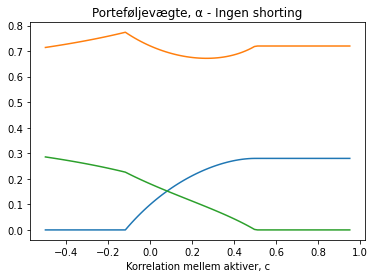

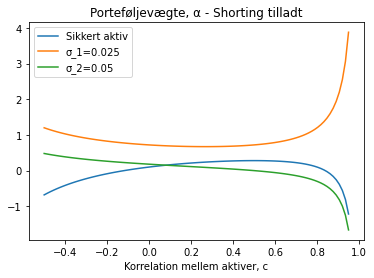

In [10]:
for shorting, lbl in zip([0,1],['Ingen shorting', 'Shorting tilladt']):
    plt.plot(x,α[:,0, shorting], label='Sikkert aktiv')
    plt.plot(x,α[:,1, shorting], label= 'σ_1='+ str(round(σ_1,4)))
    plt.plot(x,α[:,2, shorting], label= 'σ_2='+ str(round(np.sqrt(Ω[1,1]),4)) )

    plt.title('Porteføljevægte, α - ' + lbl)
    plt.xlabel('Korrelation mellem aktiver, c')  
    if shorting==1: plt.legend()    

    plt.show()  

Herefter plottes
- Forventet årlig vækst faktor
- Forventet værdi af portefølje
- Spredning på afkast af portefølje
mod korrelation mellem usikre aktiver. 

Hver kurve henviser til de to scenarier med og uden mulighed for at shorte aktiverne. 

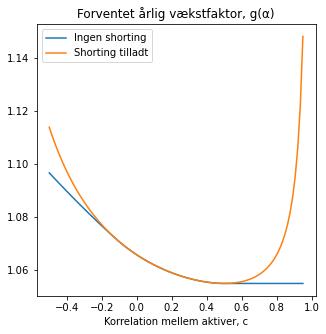

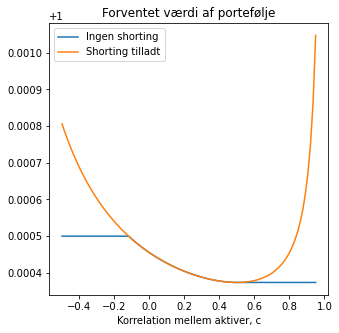

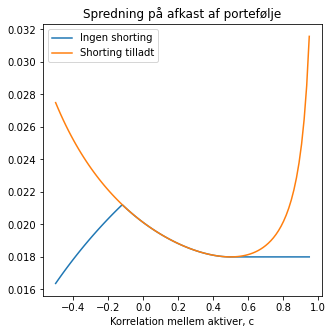

In [11]:
plt.figure(figsize=(5, 5))
plt.plot(x,g)
plt.title('Forventet årlig vækstfaktor, g(α)')
plt.xlabel('Korrelation mellem aktiver, c')
plt.legend(['Ingen shorting', 'Shorting tilladt'])
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(x, e_pf)
plt.title('Forventet værdi af portefølje')
plt.xlabel('Korrelation mellem aktiver, c')    
plt.legend(['Ingen shorting', 'Shorting tilladt'])
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(x,std_afv_pf)
plt.title('Spredning på afkast af portefølje')
plt.xlabel('Korrelation mellem aktiver, c')    
plt.legend(['Ingen shorting', 'Shorting tilladt'])
plt.show()

### Simulation
Vi simulerer dagligt afkast for $n=1000$ perioder ved at trække $n$ gange fra en normalfordeling for to variable $R_t=(R_{1t},R_{2t})$ med middelværdi $\mu=(\mu_1,\mu_2)'=(1.0005,1.0005)'$ og varians-kovarians matrix $\Omega$. 

$$R_t=(R_{1t},R_{2t})\sim N\left(\begin{bmatrix}\mu_1  \\  \mu_2 \end{bmatrix}, \begin{bmatrix}\sigma^2_1 & \sigma_{1,2} \\ \sigma_{2,1} & \sigma^2_2 \end{bmatrix}\right)$$
 
hvor vi antager at korrelation mellem de to aktiver på c=0.3, spredningen på aktiv 1 $\sigma_1=0.01$ og spredning på aktiv 2 er $\sigma_2=2\sigma_1=0.02$ sålades at spredningen for aktiv 2 er dobbelt så stor. Vi har altså $\sigma_{1,2}=\sigma_{2,1}=c\sigma_1*\sigma_1=0.00005$ 

Kursen på aktiverne på tidspunkt n, beregnes herefter som det kumulerede produkt af daglige afkast, R_i, med udgangspunkt i aktiens værdi på tidspunkt 0, som normaliseres til V_0=1 for begge aktiver:
$$V_n=V_0 R_1 R_2 \dots R_n=V_0 \prod_{i=1}^n R_i$$ 


korrelation mellem afkastet på de to aktiver, c= 0.3
Forventet afkast, μ
 [1.0005 1.0005]
Varians-kovarians matrix, Ω
 [[1.e-04 6.e-05]
 [6.e-05 4.e-04]]


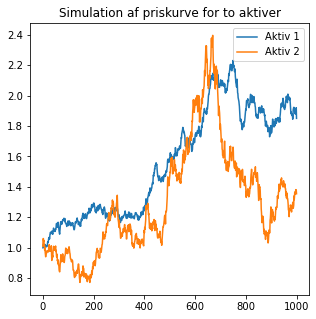

Kelly portefølje:  [0.89474221 0.10525779]


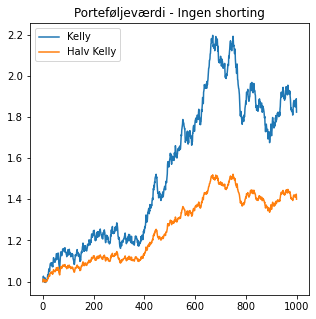

Kelly portefølje:  [4.2032967  0.49450549]


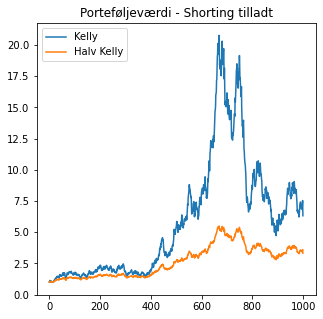

In [12]:
n=1000  # antal simulerede perioder
W0=1    # initial formue, normaliseret til 1
r_0=0.00005   # dagligt netto afkast på sikkert aktiv
R0=1+r_0;     # dagligt afkast på sikkert aktiv

μ=np.array([1+r_0*10,1+r_0*10]) # middelværdi af afkast på usikkert aktiv
σ_1=0.01;                  # spredning aktiv 1
σ_2=σ_1*2                   # spredning aktiv 2
c=0.3   # korrelation mellem afkastet på de to aktiver
Ω=np.array([[σ_1**2,σ_1*σ_2*c],[σ_1*σ_2*c, σ_2**2]])  # varians-kovarians matrix

np.random.seed(5) # sæt fast "seed" for at kunne reproducere resultater
Ri = np.random.multivariate_normal(μ, Ω, n)
print('korrelation mellem afkastet på de to aktiver, c=', c)
print('Forventet afkast, μ\n', μ)
print('Varians-kovarians matrix, Ω\n', Ω)

# Plot simulerede aktie priser
Vn=np.cumprod(Ri, axis=0)*W0
plt.figure(figsize=(5, 5))
plt.plot(Vn, label=['Aktiv 1', 'Aktiv 2'])
plt.legend()
plt.title('Simulation af priskurve for to aktiver')
plt.show()


# Plot simulerede porteføljer
def portfolio(α, Ri, R_0): # beregner afkast af portefølje i alle perioder
    return R_0+np.sum((Ri-R_0)*α.reshape(1,Ri.shape[1]), axis=1)

def Wn(α, Ri, R_0): # beregner værdi af portefølje ved at kommulere afkast
    return np.cumprod(portfolio(α, Ri, R_0), axis=0)*W0

for shorting, lbl in zip([0,1],['Ingen shorting', 'Shorting tilladt']):
    α_kelly=kelly_cont(μ,Ω,R_0, shorting)  # beregn portefølje-vægte

    # Kelly portefølje
    print('Kelly portefølje: ',α_kelly)    
    Wn_kelly=Wn(α_kelly, Ri, R_0)

    # Kelly portefølje - med halverede porteføljevægte
    Wn_half_kelly=Wn(0.5*α_kelly, Ri, R_0)
    
    # Figur
    plt.figure(figsize=(5, 5))
    plt.plot(Wn_kelly, label='Kelly')
    plt.plot(Wn_half_kelly,label='Halv Kelly')
    plt.title('Porteføljeværdi - ' + lbl)
    plt.legend()
    plt.show()

# Empirisk analyse af aktiemarkedet

### Indlæs data

In [13]:
# Import aktie data
# symbols=['NVO', 'COLO-B.CO', 'GMAB', 'NZYM-B.CO','CARL-B.CO','VWS.CO']
#dk_stocks=['NVO', 'COLO-B.CO', 'GMAB', 'NZYM-B.CO','CARL-B.CO','VWS.CO'];
dk_stocks=['NVO', 'GMAB.CO','CARL-B.CO','VWS.CO','HEINY']
us_stocks=['AAPL','MSFT', 'GOOGL', 'TSLA','NKE']
bonds=['^IRX']
symbols=dk_stocks + us_stocks + bonds
df_raw = data.DataReader(symbols, 'yahoo', start='2005/01/01', end='2022/03/31')
df_raw = df_raw['Adj Close'] # Closing price
df_raw.head()

Symbols,NVO,GMAB.CO,CARL-B.CO,VWS.CO,HEINY,AAPL,MSFT,GOOGL,TSLA,NKE,^IRX
Date,,,,,,,,,,,
2005-01-03,3.769956,99.5,168.277191,12.568684,12.870021,0.967743,18.998264,101.456459,NaN,9.070195,2.204
2005-01-04,3.645477,99.5,167.374115,12.568684,12.792956,0.977682,19.069311,97.347343,NaN,8.941178,2.292
2005-01-05,3.609910,100.0,169.782364,12.206994,12.715887,0.986245,19.026680,96.851852,NaN,8.834164,2.282
2005-01-06,3.703094,104.5,167.374115,12.206994,12.503962,0.987009,19.005363,94.369370,NaN,8.823158,2.267
2005-01-07,3.720164,107.0,168.277191,12.161783,12.503962,1.058875,18.948528,97.022018,NaN,8.771153,2.277


### Beregning af værdi og dagligt afkast på riskofrit aktiv
Bemærk: Som risikofrit afktiv benyttes 13 ugers US treasure bonds med ticker '^IRX' I ata opgøres dette som det årlige afkast målt i procent. Dette skal omregnes til dagligt afkast, så det kan sammenlignes direkte med aktie kurser.  

Metode: Beregning foretaget på baggrund af FED's anvisning besksrevet i tråd på https://quant.stackexchange.com/

Link til tråd: https://quant.stackexchange.com/questions/33076/how-to-calculate-daily-risk-free-rate-using-13-week-treasury-bill

FED anvisning: https://www.treasurydirect.gov/instit/annceresult/press/preanre/2004/ofcalc6decbill.pdf

Det risikofrie afkast beregnes som
$$R_0=1+r_0= \left(\frac{ 1}{(1 - \frac{d \cdot n}{360.0})} \right)^{1/n}$$
hvor $n=13 \cdot 7=91$ er obligationens løbetid i dage (i dette tilfælde 13 uger), og $d$ er den årlige pålydende rente. Da data i df_raw['^IRX'] måles i procent point divideres med 100, således at d=df_raw['^IRX']/100

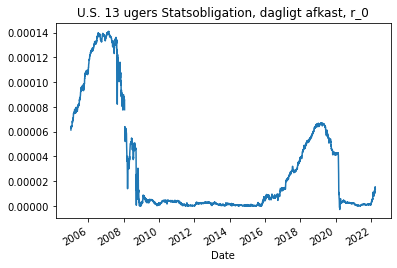

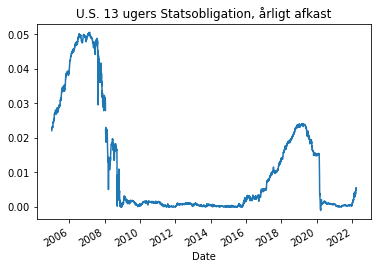

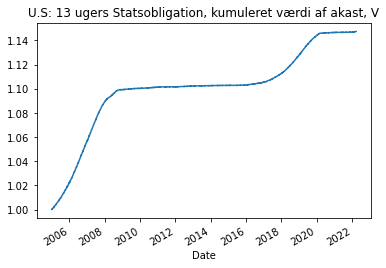

Symbols,NVO,GMAB.CO,CARL-B.CO,VWS.CO,HEINY,AAPL,MSFT,GOOGL,TSLA,NKE,^IRX
Date,,,,,,,,,,,
2005-01-03,3.769956,99.5,168.277191,12.568684,12.870021,0.967743,18.998264,101.456459,NaN,9.070195,1.000061
2005-01-04,3.645477,99.5,167.374115,12.568684,12.792956,0.977682,19.069311,97.347343,NaN,8.941178,1.000125
2005-01-05,3.609910,100.0,169.782364,12.206994,12.715887,0.986245,19.026680,96.851852,NaN,8.834164,1.000189
2005-01-06,3.703094,104.5,167.374115,12.206994,12.503962,0.987009,19.005363,94.369370,NaN,8.823158,1.000252
2005-01-07,3.720164,107.0,168.277191,12.161783,12.503962,1.058875,18.948528,97.022018,NaN,8.771153,1.000315


In [14]:
df=df_raw.copy()
d = df_raw['^IRX']/100                    # pålydende årlig rente målt i procent - omregn til andele 
n=13*7                                    # Løbetid=13 uger = 91 dage)
R_0 = ( 1.0 / (1 - d * n/360.0) )**(1/n)  # dagligt brutto afkast R_0=(1+r_0)
r_0=R_0-1                                 # dagligt netto afkast - procentvis ændring 1 krone investret i obligation
df['^IRX']=np.cumprod(R_0, axis=0)*1      # Kommuleret værdi af at investere 1 krone i sikkert aktiv

r_0.plot()
plt.title('U.S. 13 ugers Statsobligation, dagligt afkast, r_0')
plt.show()

d.plot()
plt.title('U.S. 13 ugers Statsobligation, årligt afkast')
plt.show()

df['^IRX'].plot(label='V(T-bill)')
plt.title('U.S: 13 ugers Statsobligation, kumuleret værdi af akast, V')
plt.show()

df.head()


### log(1+r)

In [15]:
log_returns = df.pct_change().apply(lambda x: np.log(1+x)) # aktier
log_returns.head()

Symbols,NVO,GMAB.CO,CARL-B.CO,VWS.CO,HEINY,AAPL,MSFT,GOOGL,TSLA,NKE,^IRX
Date,,,,,,,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,-0.033576,0.000000,-0.005381,0.000000,-0.006006,0.010218,0.003733,-0.041344,NaN,-0.014326,0.000064
2005-01-05,-0.009804,0.005013,0.014286,-0.029199,-0.006043,0.008720,-0.002238,-0.005103,NaN,-0.012041,0.000064
2005-01-06,0.025486,0.044017,-0.014286,0.000000,-0.016807,0.000774,-0.001121,-0.025966,NaN,-0.001247,0.000063
2005-01-07,0.004599,0.023642,0.005381,-0.003711,0.000000,0.070283,-0.002995,0.027721,NaN,-0.005912,0.000063


### Aktie priser

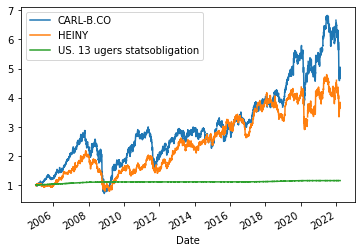

In [16]:
# aktie priser - normaliseret
#for sym in symbols:
for sym in ['CARL-B.CO','HEINY']:

    y=df[sym]/df[sym][0]
    y.plot(label=sym)
    
tbill=R_0.cumprod()
tbill.plot(label='US. 13 ugers statsobligation')
plt.legend()    
plt.show()

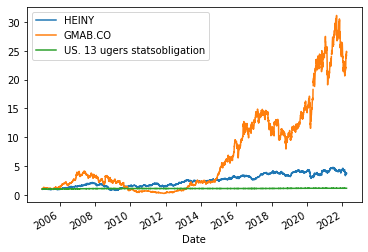

In [17]:
# aktie priser - normaliseret
#for sym in symbols:
for sym in ['HEINY','GMAB.CO']:
    y=df[sym]/df[sym][0]
    y.plot(label=sym)    
tbill.plot(label='US. 13 ugers statsobligation')
plt.legend()
    # plt.show()

### Daglige prisændinger 

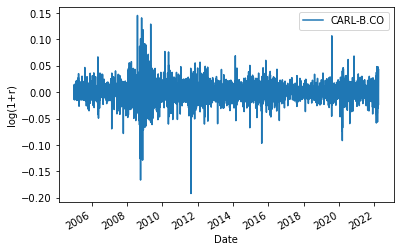

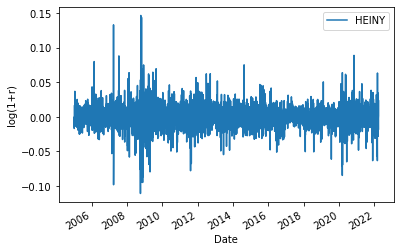

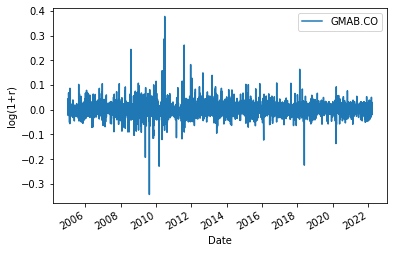

In [18]:
# ændinger er uahfænge over tid - og varians er tilnærmelses vis konstant over tid
for sym in ['CARL-B.CO','HEINY', 'GMAB.CO']:
    log_returns[sym].plot(label=sym) # try hist instead of of plot
    plt.ylabel('log(1+r)')
    plt.legend()   
    plt.show()
 

0.00035844859246668935


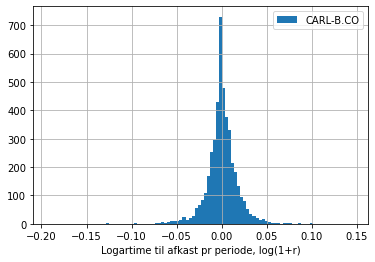

0.00029486802629101624


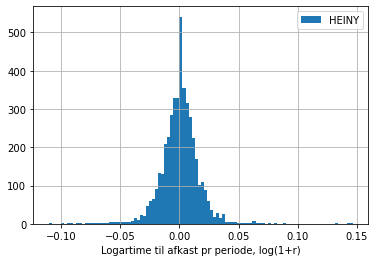

0.000720976963681994


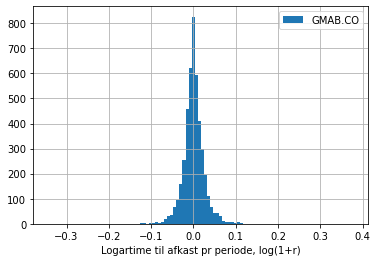

In [19]:
for sym in ['CARL-B.CO','HEINY', 'GMAB.CO']:
    log_returns[sym].hist(label=sym, bins=100)
    plt.xlabel('Logartime til afkast pr periode, log(1+r)')
    print(log_returns[sym].mean())
    plt.legend()   
    plt.show()
 

### Mean returns, covariance and correlation matrix for all assets

In [20]:
# function to compute compute mean, cov_matrix, and corr_matrix for list of assets 
def mean_cov_corr(df, assets, t=0): 
    log_returns = df.pct_change().apply(lambda x: np.log(1+x*(1-t))) # afkast
    mean_returns = (1-t)*df[assets].resample('Y').last().pct_change().mean() # årlige ændinger
    cov_matrix = log_returns[assets].cov()*252
    corr_matrix = log_returns[assets].corr()
    return  mean_returns,  cov_matrix, corr_matrix


Expected returns, μ
 Symbols
NVO          0.2565
GMAB.CO      0.3735
CARL-B.CO    0.1662
VWS.CO       0.4458
HEINY        0.1218
^IRX         0.0069
dtype: float64

Kovarians matrix, Ω
 Symbols        NVO  GMAB.CO  CARL-B.CO   VWS.CO    HEINY     ^IRX
Symbols                                                          
NVO        0.07255  0.02612    0.01639  0.02694  0.02488  0.00000
GMAB.CO    0.02612  0.19174    0.02564  0.05750  0.01757  0.00000
CARL-B.CO  0.01639  0.02564    0.08449  0.04022  0.02771  0.00000
VWS.CO     0.02694  0.05750    0.04022  0.24856  0.02650  0.00001
HEINY      0.02488  0.01757    0.02771  0.02650  0.06617  0.00000
^IRX       0.00000  0.00000    0.00000  0.00001  0.00000  0.00000

Korrelations matrix;
 Symbols      NVO  GMAB.CO  CARL-B.CO  VWS.CO  HEINY   ^IRX
Symbols                                                   
NVO        1.000    0.221      0.209   0.201  0.359  0.007
GMAB.CO    0.221    1.000      0.201   0.263  0.156  0.010
CARL-B.CO  0.209    0.201  

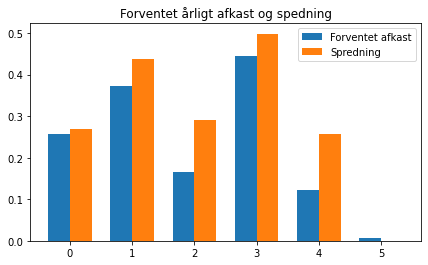

Symbols,NVO,GMAB.CO,CARL-B.CO,VWS.CO,HEINY,^IRX
Symbols,,,,,,
NVO,1.000,0.221,0.209,0.201,0.359,0.007
GMAB.CO,0.221,1.000,0.201,0.263,0.156,0.010
CARL-B.CO,0.209,0.201,1.000,0.278,0.371,0.014
VWS.CO,0.201,0.263,0.278,1.000,0.207,0.025
HEINY,0.359,0.156,0.371,0.207,1.000,0.010
^IRX,0.007,0.010,0.014,0.025,0.010,1.000


In [21]:
assets= dk_stocks  + bonds
mean_returns,  cov_matrix, corr_matrix = mean_cov_corr(df, assets)
print('Expected returns, μ\n', round(mean_returns,4))
print('\nKovarians matrix, Ω\n', round(cov_matrix,5))
print('\nKorrelations matrix;\n', round(corr_matrix,3))
#mean_returns.plot(kind='bar')
std_afv=np.sqrt(np.diag(cov_matrix))

# plot
x = np.arange(len(assets))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(7,4))
rects1 = ax.bar(x - width/2, mean_returns, width, label='Forventet afkast')
rects2 = ax.bar(x + width/2, std_afv, width, label='Spredning')

ax.set_title('Forventet årligt afkast og spedning')
#ax.set_xticks(x, assets)
ax.legend()
plt.show()

round(corr_matrix,3)

### Forventet afkast og spredning af af akast på portefølje

In [22]:
# funktion til at beregne forventet afkast og spredning
def return_volatility(α, mean_returns, cov_matrix, periods=252): 
    '''Compute expected returns and volatility of portfolio'''
    # set periods=250 to get annual returns, periods=1 for dayly returns    
    e_rp=np.dot(α, mean_returns) # Expected return of portfolio
    var = cov_matrix.mul(α, axis=0).mul(α, axis=1).sum().sum()# Portfolio variance
    sd_rp = np.sqrt(var)*np.sqrt(periods) # Period standard deviation = volatility
    return e_rp, sd_rp

### Stokastiske porteføljer 
$\alpha$ udtrækkes tilfældigt såledest at $\alpha$ summer til 1 og ligger mellem 0 og 1

In [23]:
def portfolio_random(mean_returns,  cov_matrix, assets, num_portfolios = 100000):
    ### Stikastiske porteføljer til efficient frontier
    p_ret = [] # Definer tom liste til forventet portfølje afkast
    p_vol = [] # Definer tom liste til valtilitet/spredning i portfølje afkast
    p_α = []   # Definer tom liste til portfølje vægte, α
    k = mean_returns.size # antal aktiver
    for pf in range(num_portfolios):
        α = np.random.random(k) # simuler portfølje - uniformt mellem 0 and 1
        α= α/np.sum(α) # skaler α så alle vægte summer til 1 
        e_rp, sd_rp = return_volatility(α, mean_returns, cov_matrix)
        p_ret.append(e_rp)
        p_vol.append(sd_rp)
        p_α.append(α)

    portfolios = {'Afkast':p_ret, 'Spredning':p_vol}
    for i, symbol in enumerate(assets):
        portfolios['α'+symbol] = [w[i] for w in p_α]
    portfolios['α_0'] = [1-sum(w) for w in p_α]

    portfolios=pd.DataFrame(portfolios)
    return portfolios

# test af funktion
assets=['NVO','GMAB.CO','CARL-B.CO','VWS.CO','HEINY'] + bonds
mean_returns
portfolios=portfolio_random(mean_returns,  cov_matrix, assets, num_portfolios = 10)
portfolios.sort_values(by=['Afkast']).round(4)

,Afkast,Spredning,αNVO,αGMAB.CO,αCARL-B.CO,αVWS.CO,αHEINY,α^IRX,α_0
2,0.1613,2.6800,0.0300,0.0113,0.3424,0.1539,0.1801,0.2823,0.0
7,0.1852,2.5203,0.1967,0.1197,0.1756,0.0716,0.2256,0.2108,0.0
9,0.2102,2.7208,0.2730,0.1215,0.2421,0.0933,0.0967,0.1734,0.0
5,0.2167,2.9211,0.2747,0.0358,0.1406,0.1813,0.2276,0.1400,0.0
4,0.2216,2.9904,0.3347,0.1004,0.2309,0.0785,0.2009,0.0546,0.0
0,0.2410,3.2300,0.2192,0.1820,0.1831,0.1163,0.2821,0.0174,-0.0
3,0.2566,3.2749,0.3194,0.2605,0.2321,0.0807,0.0181,0.0892,0.0
1,0.2652,3.5915,0.1082,0.1628,0.1773,0.2661,0.2312,0.0544,0.0
6,0.2723,3.5354,0.1488,0.3039,0.0579,0.2117,0.1277,0.1500,0.0
8,0.2752,3.5239,0.1966,0.1780,0.1719,0.2785,0.0377,0.1372,0.0


### Efficient frontier - optimale porteføljer for forskellige tradeoffs mellem forventet afkast og volatilitet

In [24]:
def Eutil(α, μ, Ω, R_0, θ=1): 
    '''Forventet nytte af portefølje'''
    α=α.reshape(-1,1)
    μ=μ.reshape(-1,1)
    g= θ*(R_0  + α.T @ (μ-R_0))  - 1/2  * α.T @ Ω @ α
    return  g.flatten()

def max_Eutil(μ,Ω, R_0, shorting=1, θ=1): 
    '''Optimal portfølje: Maksimer Eutil '''
    if shorting==1: 
        return  inv(Ω)@(μ-R_0) 

    if shorting==0: 
        n=μ.size # number of assets
        fun = lambda α: -Eutil(α, μ, Ω, R_0, θ)
        cons = ({'type': 'ineq', 'fun': lambda x:  1-np.sum(x)})
        bnds=Bounds(np.zeros(n),np.ones(n))
        res = minimize(fun, x0=np.ones(n)/(n+1), bounds=bnds, constraints=cons, options={'ftol': 1e-14})
        return res.x  

def portfolio_optimal(mean_returns,  cov_matrix, assets, θ):
    ### Efficient frontier
    p_θ = []   # Define an empty array for vægt på varians
    p_ret = [] # Define an empty array for portfolio returns
    p_vol = [] # Define an empty array for portfolio volatility
    p_α = []   # Define an empty array for asset weights
    k = mean_returns.size
    
    for θ_i in θ: 
        α=max_Eutil(μ=np.array(mean_returns[:]),Ω=np.array(cov_matrix),R_0=0, shorting=0, θ=θ_i)
        e_pf, sd_pf = return_volatility(α, mean_returns, cov_matrix)
        p_ret.append(e_pf)
        p_vol.append(sd_pf)
        p_α.append(α)
        if θ_i ==1:
            p_θ.append('1 (Kelly)')
        else:
            p_θ.append(θ_i)

    portfolios = {'Risiko tolerance, θ':p_θ, 'Afkast':p_ret, 'Spredning':p_vol}
    portfolios['α_0'] = [1-sum(w) for w in p_α]

    for i, symbol in enumerate(assets):
        portfolios['α'+symbol] = [w[i] for w in p_α]

    portfolios=pd.DataFrame(portfolios)
    return portfolios

# vælg aktiver der analyseres
assets=['NVO','GMAB.CO','CARL-B.CO','VWS.CO','HEINY'] + bonds
#assets=us_stocks + dk_stocks + bonds

mean_returns,  cov_matrix, corr_matrix = mean_cov_corr(df, assets)

portfolios_opt=portfolio_optimal(mean_returns,  cov_matrix, assets, θ = [0,0.01,0.025,0.05, 0.1, 0.15, 0.2, 1])
portfolios_opt.round(3)


,"Risiko tolerance, θ",Afkast,Spredning,α_0,αNVO,αGMAB.CO,αCARL-B.CO,αVWS.CO,αHEINY,α^IRX
0,0,0.001,0.002,0.857,0.000,0.000,0.000,0.000,0.0,0.143
1,0.01,0.023,0.203,0.000,0.025,0.012,0.005,0.011,0.0,0.947
2,0.025,0.048,0.507,0.000,0.062,0.029,0.013,0.029,0.0,0.868
3,0.05,0.088,1.013,0.000,0.124,0.058,0.025,0.057,0.0,0.735
4,0.1,0.170,2.027,0.000,0.248,0.116,0.051,0.115,0.0,0.470
5,0.15,0.251,3.040,0.000,0.372,0.174,0.076,0.172,0.0,0.205
6,0.2,0.319,3.880,0.000,0.468,0.226,0.078,0.227,0.0,0.000
7,1 (Kelly),0.419,6.197,-0.000,0.000,0.365,0.000,0.635,0.0,0.000


### Beregn efficient frontier og tilføj porteføljer iht. Kelly, maksimum return og minimum volatilitet 

In [25]:
# beregn middelafkast og varians-kovarins for aktiver der analyseres
assets=us_stocks + dk_stocks + bonds
assets=['NVO','CARL-B.CO','HEINY','VWS.CO'] + bonds
mean_returns,  cov_matrix, corr_matrix = mean_cov_corr(df,assets, t=0.0)

# beregn optimal portefølje for forskellig vægtning af varians
portfolios_opt=portfolio_optimal(mean_returns, cov_matrix, assets, θ =  np.linspace(0,1,100))

# simuler tilfældige (ikke nødvedigvis efficiente) porteføljer til illustration af efficient frontier
portfolios_rand=portfolio_random(mean_returns, cov_matrix, assets, num_portfolios = 100000)
print('Done - ready to plot effcient fontier and random portfolio')

Done - ready to plot effcient fontier and random portfolio


### Plot efficient frontier

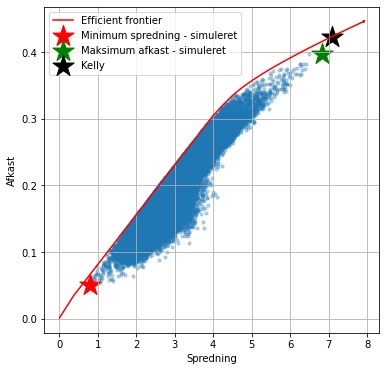

In [26]:
# beregn portefølje med minimum volatilitet 
min_vol_port = portfolios_rand.iloc[portfolios_rand['Spredning'].idxmin()] # idxmin() giver minimum værdi i specificeret kolonne.                               

portfolios_opt=portfolio_optimal(mean_returns, cov_matrix, assets, θ =  np.linspace(0,2,101))

# beregn portefølje med maksimalt afkast 
max_ret_port = portfolios_rand.iloc[portfolios_rand['Afkast'].idxmax()] # idxmax() giver maksimums værdi i specificeret kolonne.                                

# udvælg portefølje (maksimalt afkast)
kelly_port = portfolios_opt[portfolios_opt['Risiko tolerance, θ']=='1 (Kelly)']                       

portfolios_rand.plot.scatter(x='Spredning', y='Afkast', marker='o', s=10, 
                        alpha=0.3, grid=True, figsize=[6,6])
plt.plot(portfolios_opt['Spredning'],portfolios_opt['Afkast'], color='r',  label='Efficient frontier')

plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500, label='Minimum spredning - simuleret')
plt.scatter(max_ret_port[1], max_ret_port[0], color='g', marker='*', s=500, label='Maksimum afkast - simuleret')
plt.scatter(kelly_port['Spredning'], kelly_port['Afkast'],color='k', marker='*', s=500,label='Kelly')
plt.legend()



### Skat på på aktie afkast (lager beskatning)

<function matplotlib.pyplot.show(close=None, block=None)>

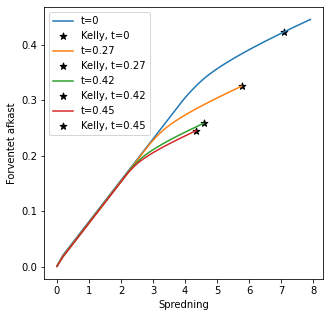

In [27]:
assets=us_stocks + dk_stocks + bonds
assets=['NVO','CARL-B.CO','HEINY','VWS.CO'] + bonds

plt.figure(figsize=(5,5))
taxes=[0, 0.27, .42, 0.45]

portfolios_tax=list(range(len(taxes)))

for i, t in enumerate(taxes): 
    # beregn middelafkast og varians-kovarins for aktiver der analyseres
    mean_returns,  cov_matrix, corr_matrix = mean_cov_corr(df,assets, t)

    # beregn optimal portefølje for forskellig vægtning af varians
    portfolios_opt=portfolio_optimal(mean_returns, cov_matrix, assets, θ =  np.linspace(0,2,201))

    # udvælg portefølje (maksimalt afkast)
    kelly_port = portfolios_opt[portfolios_opt['Risiko tolerance, θ']=='1 (Kelly)']                       
    
    plt.plot(portfolios_opt['Spredning'],portfolios_opt['Afkast'],  label='t=' + str(t))
    plt.scatter(kelly_port['Spredning'], kelly_port['Afkast'],color='k', marker='*', s=50,label='Kelly, t=' + str(t))
    plt.xlabel('Spredning')
    plt.ylabel('Forventet afkast')
    portfolios_tax[i]=portfolio_optimal(mean_returns,  cov_matrix, assets, θ = [0,0.01,0.025,0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2])
    
plt.legend()

plt.show

In [28]:
i=0 # kan være 0,1,2,3
print('Skattesats=', taxes[i])
portfolios_tax[i].round(3)

Skattesats= 0


,"Risiko tolerance, θ",Afkast,Spredning,α_0,αNVO,αCARL-B.CO,αHEINY,αVWS.CO,α^IRX
0,0,0.001,0.002,0.833,0.000,0.000,0.0,0.000,0.167
1,0.01,0.021,0.188,-0.000,0.028,0.007,0.0,0.013,0.952
2,0.025,0.042,0.470,0.000,0.070,0.018,0.0,0.034,0.879
3,0.05,0.077,0.939,0.000,0.139,0.035,0.0,0.068,0.758
4,0.1,0.147,1.878,0.000,0.278,0.070,0.0,0.135,0.516
5,0.15,0.217,2.817,0.000,0.417,0.106,0.0,0.203,0.275
6,0.2,0.287,3.756,0.000,0.556,0.141,0.0,0.270,0.033
7,0.3,0.326,4.343,0.000,0.600,0.023,0.0,0.377,0.000
8,0.4,0.342,4.661,-0.000,0.546,0.000,0.0,0.454,0.000
9,0.5,0.356,4.977,-0.000,0.475,0.000,0.0,0.525,0.000


In [29]:
i=1 # kan være 0,1,2,3
print('Skattesats =', taxes[i])
portfolios_tax[i].round(3)

Skattesats = 0.27


,"Risiko tolerance, θ",Afkast,Spredning,α_0,αNVO,αCARL-B.CO,αHEINY,αVWS.CO,α^IRX
0,0,0.001,0.001,0.833,0.000,0.000,0.0,0.000,0.167
1,0.01,0.019,0.188,0.000,0.038,0.010,0.0,0.019,0.934
2,0.025,0.040,0.470,0.000,0.095,0.024,0.0,0.046,0.834
3,0.05,0.075,0.940,-0.000,0.191,0.048,0.0,0.093,0.668
4,0.1,0.145,1.880,0.000,0.382,0.097,0.0,0.186,0.336
5,0.15,0.215,2.820,0.000,0.572,0.145,0.0,0.279,0.004
6,0.2,0.232,3.067,-0.000,0.592,0.057,0.0,0.351,0.000
7,0.3,0.251,3.425,0.000,0.537,0.000,0.0,0.463,0.000
8,0.4,0.265,3.755,0.000,0.440,0.000,0.0,0.560,0.000
9,0.5,0.278,4.142,0.000,0.342,0.000,0.0,0.658,0.000


In [30]:
i=2 # kan være 0,1,2,3
print('Skattesats =', taxes[i])
portfolios_tax[i].round(3)

Skattesats = 0.42


,"Risiko tolerance, θ",Afkast,Spredning,α_0,αNVO,αCARL-B.CO,αHEINY,αVWS.CO,α^IRX
0,0,0.001,0.001,0.833,0.000,0.000,0.0,0.000,0.167
1,0.01,0.018,0.188,-0.000,0.048,0.012,0.0,0.023,0.916
2,0.025,0.039,0.470,-0.000,0.120,0.031,0.0,0.058,0.791
3,0.05,0.074,0.941,-0.000,0.240,0.061,0.0,0.117,0.582
4,0.1,0.144,1.881,0.000,0.480,0.122,0.0,0.234,0.163
5,0.15,0.182,2.390,0.000,0.588,0.077,0.0,0.335,0.000
6,0.2,0.194,2.614,0.000,0.584,0.000,0.0,0.416,0.000
7,0.3,0.208,2.920,0.000,0.461,0.000,0.0,0.539,0.000
8,0.4,0.221,3.302,0.000,0.338,0.000,0.0,0.662,0.000
9,0.5,0.235,3.736,-0.000,0.216,0.000,0.0,0.784,0.000


In [31]:
i=3 # kan være 0,1,2,3
print('Skattesats=', taxes[i])
portfolios_tax[i].round(3)

Skattesats= 0.45


,"Risiko tolerance, θ",Afkast,Spredning,α_0,αNVO,αCARL-B.CO,αHEINY,αVWS.CO,α^IRX
0,0,0.001,0.001,0.833,0.000,0.000,0.0,0.000,0.167
1,0.01,0.018,0.188,-0.000,0.051,0.013,0.0,0.025,0.912
2,0.025,0.039,0.470,0.000,0.127,0.032,0.0,0.062,0.779
3,0.05,0.074,0.941,0.000,0.253,0.064,0.0,0.123,0.559
4,0.1,0.144,1.881,0.000,0.507,0.129,0.0,0.247,0.118
5,0.15,0.175,2.306,0.000,0.592,0.058,0.0,0.350,0.000
6,0.2,0.186,2.506,0.000,0.570,0.000,0.0,0.430,0.000
7,0.3,0.199,2.824,-0.000,0.441,0.000,0.0,0.559,0.000
8,0.4,0.213,3.217,-0.000,0.312,0.000,0.0,0.688,0.000
9,0.5,0.226,3.661,0.000,0.182,0.000,0.0,0.818,0.000


In [32]:
portfolios_tax=list(range(len(taxes)))
for i, t in enumerate(taxes): 
    # beregn middelafkast og varians-kovarins for aktiver der analyseres
    mean_returns,  cov_matrix, corr_matrix = mean_cov_corr(df,assets, t)

    # beregn optimal portefølje for forskellig vægtning af varians
    portfolios_tax[i]=portfolio_optimal(mean_returns, cov_matrix, assets, θ =  np.linspace(0.001,1.5,201))

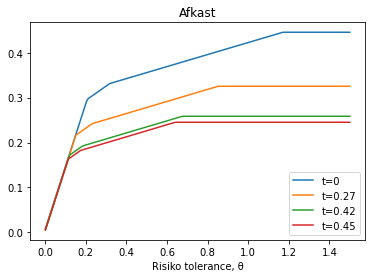

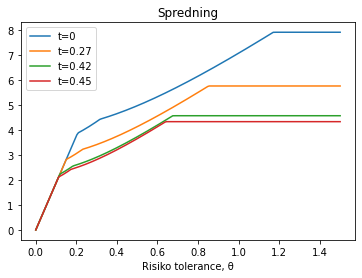

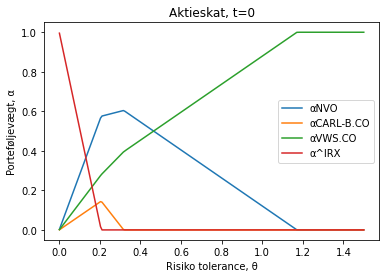

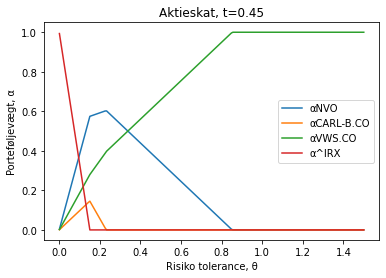

In [33]:
for var in ['Afkast', 'Spredning']:
    for i, tax in enumerate(taxes):
        x=portfolios_tax[i]['Risiko tolerance, θ'].copy()
        x[x=='1 (Kelly)']=1
        y=portfolios_tax[i][var]
        plt.plot(x,y, label='t='+str(tax))
    plt.legend() 
    plt.title(var)
    plt.xlabel('Risiko tolerance, θ')
    plt.show()

for i, tax in enumerate([taxes[0],taxes[-1]]):
    x=portfolios_tax[i]['Risiko tolerance, θ'].copy()
    x[x=='1 (Kelly)']=1
    y=portfolios_tax[i][['αNVO','αCARL-B.CO','αVWS.CO','α^IRX']]
    plt.plot(x,y)
    plt.title('Aktieskat, t='+str(tax))
    plt.legend(['αNVO','αCARL-B.CO','αVWS.CO','α^IRX']) 
    plt.xlabel('Risiko tolerance, θ')
    plt.ylabel('Porteføljevægt, α')
    plt.show()

# Litteratur
1. Carta, A., & Conversano, C. (2020). "Practical Implementation of the Kelly Criterion: Optimal Growth Rate, Number of Trades, and Rebalancing Frequency for Equity Portfolios." *Frontiers in Applied Mathematics and Statistics*, 46.

1. Kelly Jr, J. L. (1956). "A new interpretation of the information rate", *Bell Systems Technical Journal*, 35, 917-926.